# Installing and importing libraries

In [270]:
!pip install statsbombpy
!pip install nose2
!nose2 -v --pretty-assert
!pip install socceraction


----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


All libraries are imported here

In [365]:
import pandas as pd
import numpy as np
from statsbombpy import sb
from sklearn.preprocessing import LabelEncoder
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


warnings.filterwarnings("ignore")

# Data Engineering

## Creating out the data and exploring it

In [272]:
dir(sb)

['DEFAULT_CREDS',
 'MAX_CONCURRENCY',
 'Pool',
 'Union',
 '_360_frames',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'api_client',
 'competition_events',
 'competition_frames',
 'competitions',
 'events',
 'filter_and_group_events',
 'frames',
 'lineups',
 'matches',
 'merge_events_and_frames',
 'partial',
 'pd',
 'player_match_stats',
 'player_season_stats',
 'public',
 'reduce_events',
 'team_season_stats']

## Getting competition that we need

In [273]:
df = sb.competitions() # Show all competitions

FWC = df[df['competition_name'] == 'FIFA World Cup']
FWC # See all the tournaments for the Fifa World Cup

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
22,43,106,International,FIFA World Cup,male,False,True,2022,2023-07-15T22:01:09.812380,2023-07-15T22:01:52.119586,2023-07-15T22:01:52.119586,2023-07-15T22:01:09.812380
23,43,3,International,FIFA World Cup,male,False,True,2018,2022-09-05T17:17:56.670896,2021-06-13T16:17:31.694,None,2022-09-05T17:17:56.670896
24,43,51,International,FIFA World Cup,male,False,True,1974,2023-07-17T23:19:58.853207,2021-06-13T16:17:31.694,None,2023-07-17T23:19:58.853207


In [274]:
df.loc[:, "competition_name"]

0            Champions League
1            Champions League
2            Champions League
3            Champions League
4            Champions League
5            Champions League
6            Champions League
7            Champions League
8            Champions League
9            Champions League
10           Champions League
11           Champions League
12           Champions League
13           Champions League
14           Champions League
15           Champions League
16           Champions League
17           Champions League
18               Copa del Rey
19    FA Women's Super League
20    FA Women's Super League
21    FA Women's Super League
22             FIFA World Cup
23             FIFA World Cup
24             FIFA World Cup
25        Indian Super league
26                    La Liga
27                    La Liga
28                    La Liga
29                    La Liga
30                    La Liga
31                    La Liga
32                    La Liga
33        

In [275]:
df.columns

Index(['competition_id', 'season_id', 'country_name', 'competition_name',
       'competition_gender', 'competition_youth', 'competition_international',
       'season_name', 'match_updated', 'match_updated_360',
       'match_available_360', 'match_available'],
      dtype='object')

## All the matches that happened in the World Cup 2022

In [276]:
WC22 = sb.matches(competition_id= 43, season_id = 106).head(3) # They are 64 rows in total because there were 64 games.
WC22

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-05-14T23:35:15.370647,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2


In [277]:
ARG_AUS_events = sb.events(match_id=3869151) # ARG VS AUS
ARG_AUS_events.head(3)

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 442, 'lineup': [{'player': {'id'...",Australia,792,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Australia,792,00:00:00.000,Half Start,NaN


In [278]:
sb.events(match_id=3869151, split=True, flatten_attrs=False)["dribbles"].head(3)

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,position,location,duration,under_pressure,related_events,dribble,match_id,possession_team_id,team_id,player_id
0,99b8ff1b-6a2e-4760-80e0-23ea3faad7b4,542,1,00:10:39.234,10,39,Dribble,19,Argentina,From Throw In,...,Left Wing,"[37.4, 19.6]",0.0,True,"[538e28ba-619c-4dc2-9000-813213a7d2b2, 9002f77...","{'outcome': {'id': 9, 'name': 'Incomplete'}}",3869151,779,779,7006
1,535ff683-fb17-453c-a244-47bb68ed945a,899,1,00:18:00.854,18,0,Dribble,27,Argentina,Regular Play,...,Right Back,"[33.3, 75.3]",0.0,True,[3bbe48cd-14c3-4d28-a52b-70d9a3495e6f],"{'outcome': {'id': 9, 'name': 'Incomplete'}}",3869151,779,779,29201
2,abba290b-f012-4617-83a5-629d6884a7bf,1446,1,00:29:08.965,29,8,Dribble,45,Australia,Regular Play,...,Right Back,"[19.4, 72.3]",0.0,True,[a704f209-00a7-42f4-a4c2-ca05c38d5c69],"{'outcome': {'id': 8, 'name': 'Complete'}}",3869151,792,792,15957


In [279]:
sb.lineups(match_id=3869151)["Argentina"].head(3)

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,2995,Ángel Fabián Di María Hernández,Ángel Di María,11,Argentina,[],[]
1,3090,Nicolás Hernán Otamendi,Nicolás Otamendi,19,Argentina,[],"[{'position_id': 5, 'position': 'Left Center B..."
2,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,Argentina,[],"[{'position_id': 23, 'position': 'Center Forwa..."


In [280]:
arg_vs_aus = sb.events(match_id=3869151, split=True, flatten_attrs=False)['passes']
arg_vs_aus.head(3)
arg_vs_aus['location'].max() # Here we can know that they are using the pitch dimensions in yards.

[120.0, 80.0]

In [281]:
arg_vs_aus.keys()

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'pass',
       'match_id', 'possession_team_id', 'team_id', 'player_id',
       'under_pressure', 'off_camera', 'counterpress', 'out'],
      dtype='object')

In [282]:
sb.events(match_id=3857254, split=True, flatten_attrs=False)["dribbles"].head(3) # get all the events dribbles for  Argentia vs Australia

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,position,location,duration,under_pressure,related_events,dribble,match_id,possession_team_id,team_id,player_id
0,4fbb9158-3623-429f-8e9d-8ef3b95921ee,192,1,00:04:15.413,4,15,Dribble,13,Tunisia,Regular Play,...,Right Center Back,"[97.4, 63.1]",0.0,True,[10cb6ed6-e822-46fa-8a14-96d665cf1692],"{'outcome': {'id': 9, 'name': 'Incomplete'}, '...",3857254,777,777,5655
1,0d98a659-01a2-4b7c-9283-2da40e473713,631,1,00:15:24.934,15,24,Dribble,33,Denmark,Regular Play,...,Left Center Midfield,"[74.2, 6.2]",0.0,True,[b06d46af-7af5-4678-8bfb-a061c8a51139],"{'outcome': {'id': 9, 'name': 'Incomplete'}}",3857254,776,776,3043
2,77da4c97-2689-4728-8d8e-e76ebce2c0d5,636,1,00:15:28.127,15,28,Dribble,33,Denmark,Regular Play,...,Left Center Midfield,"[81.4, 3.7]",0.0,True,[d7dc79ac-1fe8-4d05-93fd-f082d0e81b79],"{'outcome': {'id': 9, 'name': 'Incomplete'}}",3857254,776,776,3043


## Combining all the events that happened in the WC

In [283]:
# Combining all the events of the Fifa World Cup 2022
events = sb.competition_events(
    country="International",
    division= "FIFA World Cup",
    season="2022",
    gender="male"
)

WC_events22 = sb.competition_events(
    country="International",
    division= "FIFA World Cup",
    season="2022",
    split=True
)
# WC_events22['dribbles'] # Get all the dribbles that happened in the world cup

# grouped_events.drop('id', axis=1, inplace=True)

In [284]:
# Get the list of column names or keys
key_names = WC_events22.keys()

# Print the column names
for key in key_names:
    print(key)

starting_xis
half_starts
passes
ball_receipts
carrys
clearances
ball_recoverys
shots
blocks
goal_keepers
miscontrols
pressures
duels
interceptions
foul_committeds
foul_wons
dispossesseds
dribbles
dribbled_pasts
errors
injury_stoppages
half_ends
substitutions
bad_behaviours
referee_ball_drops
tactical_shifts
player_offs
player_ons
shields
own_goal_fors
own_goal_againsts
50/50s
offsides


get expected goals

In [285]:
WC_events22['shots'].columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'shot_statsbomb_xg', 'shot_end_location', 'shot_technique',
       'shot_body_part', 'shot_type', 'shot_outcome', 'shot_first_time',
       'shot_freeze_frame', 'possession_team_id', 'team_id', 'player_id',
       'shot_key_pass_id', 'shot_one_on_one', 'shot_deflected',
       'under_pressure', 'shot_open_goal', 'shot_aerial_won', 'out',
       'shot_follows_dribble', 'shot_saved_to_post', 'shot_saved_off_target',
       'shot_redirect'],
      dtype='object')

In [286]:
type(WC_events22)

collections.defaultdict

## Get all the shot events in the tournament between player to xG

In [287]:
xg_df = WC_events22['shots']
xG = xg_df.loc[:, 'player':'shot_statsbomb_xg']
xG

,player,position,location,duration,related_events,match_id,shot_statsbomb_xg
0,Granit Xhaka,Left Defensive Midfield,"[96.0, 38.8]",0.380264,"[23ce15e2-05d8-4adf-87de-90b82585c085, b27d5a6...",3857256,0.036566
1,Breel-Donald Embolo,Center Forward,"[113.1, 40.7]",0.175803,[ca8f5082-211d-4c5e-9827-b61cf7fa7ca2],3857256,0.353289
2,Granit Xhaka,Left Defensive Midfield,"[103.8, 41.9]",0.495575,[03e8c43d-a1ee-4477-a6cd-3761b9379837],3857256,0.069527
3,Nikola Milenković,Right Center Back,"[112.2, 36.8]",0.848375,[42dca3d5-9c35-4da4-8d13-0ae643b4d9c7],3857256,0.081609
4,Andrija Živković,Right Wing Back,"[97.8, 51.5]",0.934407,[66f1d9e3-640c-493d-80e6-33a247444389],3857256,0.030002
...,...,...,...,...,...,...,...
1489,Andreas Evald Cornelius,Center Forward,"[118.2, 43.9]",0.058813,[b2cf8522-fd3d-44ae-b3d2-6a2c2d40ce7a],3857254,0.568312
1490,Mathias Jensen,Left Defensive Midfield,"[102.5, 24.2]",0.995427,[100b467e-ced3-4e97-ab89-3656d3ab04c5],3857254,0.028724
1491,Andreas Evald Cornelius,Center Forward,"[114.4, 36.8]",1.239140,"[a4edfab9-529b-4f34-b150-bf665f559ce5, f1dcd43...",3857254,0.145394
1492,Joakim Mæhle,Left Back,"[95.0, 30.2]",0.164703,"[2da1a8a2-7c43-4ffa-91da-a4ed3d276e8c, 8c6aa51...",3857254,0.028684


Creating our class xT to predict on

In [288]:
# class xT:
#   def __int__(self, x):
#     self.x = x

#   def get_x(self):
#     return self.x

#   def set_x(self, new_x):
#     self.x = new_x

In [289]:
Final_df = pd.DataFrame()
type(Final_df)

pandas.core.frame.DataFrame

In [290]:
WC_events22['passes']['pass_outcome'].unique()
WC_events22['passes']['pass_outcome'].fillna('Complete', inplace=True)

## Combining the relevent data into one dataframe

In [291]:
# Merge the DataFrames based on 'match_id', 'index', and 'location' columns
# Now, create a new DataFrame by taking the 'column_name' column from df1
WC_events22_passes = WC_events22['passes'][['match_id','index', 'team', 'player' ,'timestamp','minute', 'second', 'duration','period', 'pass_goal_assist',
                                           'possession' ,'position','play_pattern' ,'location', 'type',
                                            'pass_end_location', 'under_pressure', 'pass_length',  'pass_angle']].copy()

WC_events22_carrys = WC_events22['carrys'][['match_id','index', 'team', 'player' ,'timestamp','minute',
                                            'second', 'period','possession','position' , 'play_pattern', 'duration',
                                            'location', 'type',  'carry_end_location', 'under_pressure'
                                            ]].copy()

# WC_events22_dribbles = WC_events22['dribbles'][['match_id','index', 'team', 'player' ,'timestamp','minute', 'duration',
#                                                 'second', 'period','possession','position' ,
#                                                 'location', 'type', 'under_pressure'  ]].copy()


WC_events22_shot = WC_events22['shots'][['match_id','index', 'team', 'player' ,'timestamp','minute', 'second', 'period','duration',
                                         'possession', 'position' ,'play_pattern' ,'location','shot_outcome', 'shot_end_location' , 'shot_technique',
                                         'shot_statsbomb_xg' , 'type', 'under_pressure', 'shot_type', 'shot_body_part']].copy()


# Combine the DataFrames by stacking them vertically (top on top)
final_df = pd.concat([WC_events22_passes, WC_events22_carrys, WC_events22_shot

                      ], axis=0)
# The most important events that we have is shoot, pass, dribble, carry.

# Sort the final DataFrame by 'index' column
final_df.sort_values(by=['match_id','index'], inplace=True)

# Reset the index of the DataFrame
final_df.reset_index(drop=True, inplace=True)

final_df.head(3)
'''
shot_first_time          1026
shot_one_on_one          1409
shot_deflected           1472
shot_open_goal           1481
shot_aerial_won          1365
shot_follows_dribble     1491
shot_saved_to_post       1491
shot_saved_off_target    1492
shot_redirect            1492

they are missing almost all of them so we have to delete it from our code.
'''


'\nshot_first_time          1026\nshot_one_on_one          1409\nshot_deflected           1472\nshot_open_goal           1481\nshot_aerial_won          1365\nshot_follows_dribble     1491\nshot_saved_to_post       1491\nshot_saved_off_target    1492\nshot_redirect            1492\n\nthey are missing almost all of them so we have to delete it from our code.\n'

In [292]:
final_df['under_pressure'] = final_df['under_pressure'].fillna(False)
final_df['under_pressure'].unique()

final_df['pass_goal_assist'] = final_df['pass_goal_assist'].fillna(False)
final_df['pass_goal_assist'].unique()

array([False,  True])

Removing the penalties shootout from the equation

In [293]:
final_df = final_df.drop(final_df[final_df['period'] == 5].index)
# final_df

'''
 Goals scored and xG generated from penalties are often removed
 from player and team totals when analysing performance.

 https://statsbomb.com/soccer-metrics/expected-goals-xg-explained/.
'''

'\n Goals scored and xG generated from penalties are often removed \n from player and team totals when analysing performance.\n\n https://statsbomb.com/soccer-metrics/expected-goals-xg-explained/.\n'

## Combining the end locations together to make end_location

combine all end locations together

In [294]:
final_df['end_location'] = final_df['pass_end_location']
final_df['end_location'] = final_df['end_location'].combine_first(final_df['carry_end_location'])
final_df['end_location'] = final_df['end_location'].combine_first(final_df['shot_end_location'])
final_df.columns

Index(['match_id', 'index', 'team', 'player', 'timestamp', 'minute', 'second',
       'duration', 'period', 'pass_goal_assist', 'possession', 'position',
       'play_pattern', 'location', 'type', 'pass_end_location',
       'under_pressure', 'pass_length', 'pass_angle', 'carry_end_location',
       'shot_outcome', 'shot_end_location', 'shot_technique',
       'shot_statsbomb_xg', 'shot_type', 'shot_body_part', 'end_location'],
      dtype='object')

Combine all the types of technique

combine all types of type events

Drop all the excess columns after joining them

In [295]:
final_df = final_df.drop(columns=['pass_end_location', 'carry_end_location'

                                  ])


## Apply the formula to find xT

### We need to do binning first to make the grid into equal dimensions

The formula is: xTxy = (Sxy * Gxy) + (Mxy 16∑ 12∑T(x,y)→(z,w)xTz,w )


In [296]:

def create_grid_cells(location, num_rows, num_columns, x_max, y_max):
    """
    Assign a grid cell to each location based on its (x, y) coordinates.

    Parameters:
        location (tuple): (x, y) coordinates of the location.
        num_rows (int): Number of rows in the grid.
        num_columns (int): Number of columns in the grid.
        x_max (float): Maximum x-coordinate value on the field.
        y_max (float): Maximum y-coordinate value on the field.

    Returns:
        tuple: (row, column) indices of the grid cell for the given location.
    """
    x, y = location
    row = int(num_rows * y / y_max)
    column = int(num_columns * x / x_max)
    return row, column

# Define the dimensions of the grid (12x16)
num_rows, num_columns = 11, 15

# Determine the maximum x and y coordinates from the 'location' column
x_max = final_df['location'].apply(lambda loc: loc[0]).max()
y_max = final_df['location'].apply(lambda loc: loc[1]).max()

# Create new columns 'row' and 'column' to store the grid cell indices
final_df[['row', 'column']] = final_df['location'].apply(lambda loc: create_grid_cells(loc, num_rows, num_columns, x_max, y_max)).tolist()

# Now the 'final_df' DataFrame contains the 'row' and 'column' columns with the grid cell indices for each location.
print("There is {} rows and {} columns ".format(final_df['row'].max(), final_df['column'].max()))

There is 11 rows and 15 columns 


In [297]:
final_df['start_cell'] = final_df[['row', 'column']].apply(np.array, axis=1)

Now we need to create the same thing but the end location for the event

some events that are shots have the end location and also the height of the shot when it ends up in goal

In [298]:
final_df['end_location'] = final_df['end_location'].apply(lambda x:
                                    x[:-1] if isinstance(x, list) and len(x) == 3 else x)

In [299]:
def create_end_grid_cells(location, num_rows, num_columns, x_max, y_max):
    """
    Assign a grid cell to each location based on its (x, y) coordinates.

    Parameters:
        location (tuple): (x, y) coordinates of the location.
        num_rows (int): Number of rows in the grid.
        num_columns (int): Number of columns in the grid.
        x_max (float): Maximum x-coordinate value on the field.
        y_max (float): Maximum y-coordinate value on the field.

    Returns:
        tuple: (row, column) indices of the grid cell for the given location.
    """
    x, y = location
    row = int(num_rows * y / y_max)
    column = int(num_columns * x / x_max)
    return row, column

# Define the dimensions of the grid (12x16)
num_rows, num_columns = 11, 15

x_max = final_df['end_location'].apply(lambda loc: loc[0]).max()
y_max = final_df['end_location'].apply(lambda loc: loc[1]).max()

# Create new columns 'row' and 'column' to store the grid cell indices
final_df[['end_row', 'end_column']] = final_df['end_location'].apply(lambda loc: create_end_grid_cells(loc, num_rows, num_columns, x_max, y_max)).tolist()

# Now the 'final_df' DataFrame contains the 'row' and 'column' columns with the grid cell indices for each location.
print("There is {} end rows and {} end columns ".format(final_df['end_row'].max(), final_df['end_column'].max()))


There is 11 end rows and 15 end columns 


In [300]:
final_df['end_cell'] = final_df[['end_row', 'end_column']].apply(np.array, axis=1)

In [301]:
# final_df.isnull().sum()
# final_df

### We calculate the expected shot, move, transition from x,y to z,w , and xTzw

### Shooting probability (xSxy)

In [302]:
def shot_probability(df):
    """
    Calculate the shot probabilities for all grid cells in the DataFrame.

    Parameters:
        df (pandas.core.frame.DataFrame): The DataFrame containing all the events.

    Returns:
        np.ndarray: A matrix, denoting the shot probabilities for each cell.
    """
    # Filter the DataFrame to include only Shot events
    shot_actions = df[df['type'] == 'Shot']

    # Count the total number of Shot events in the DataFrame
    total_shot_events = shot_actions.shape[0]

    if total_shot_events == 0:
        return np.zeros((l, w))

    # Initialize the shot probabilities matrix
    l, w = df['row'].max() + 1, df['column'].max() + 1
    shot_probabilities = np.zeros((l, w))

    # Calculate the shot probabilities for each cell in the grid
    for row in range(l):
        for column in range(w):
            cell_events = shot_actions[(shot_actions['row'] == row) & (shot_actions['column'] == column)]
            shot_probabilities[row, column] = cell_events.shape[0] / total_shot_events

    return shot_probabilities

# Example usage:
# Call the shot_probability function to get the shot probability matrix
shooting_matrix = shot_probability(final_df)

print("Shot Probability Matrix:")
print(shooting_matrix)


Shot Probability Matrix:
[[0.         0.         0.         0.         0.         0.
  0.         0.00068823 0.         0.         0.         0.
  0.         0.         0.00137646 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00137646 0.00068823 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.00206469 0.00412939
  0.00963524 0.00550585 0.00068823 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.00137646 0.02133517
  0.03578802 0.04886442 0.01514109 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.00550585 0.02890571
  0.04886442 0.0770819  0.04748796 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00068823 0.         0.         0.00757054

In [303]:

# def shot_probability(row, column, df):
#     """
#     Calculate the shot probability for a specific 'row' and 'column' in the DataFrame.

#     Parameters:
#         row (int): The row index representing the grid cell.
#         column (int): The column index representing the grid cell.
#         df (pandas.core.frame.DataFrame): The DataFrame containing all the events.

#     Returns:
#         float: The shot probability for the specified 'row' and 'column'.
#     """
#     # Filter the DataFrame to include only Shot events in the specific 'row' and 'column'
#     shot_events = df[(df['type'] == 'Shot') & (df['row'] == row) & (df['column'] == column)]

#     # Count the total number of events in the DataFrame
#     total_events = len(df)

#     if total_events == 0:
#         return 0.0

#     # Calculate the shot probability for the specific 'row' and 'column'
#     shot_probability = len(shot_events) / total_events

#     return shot_probability

# # Example usage:
# # Assuming you have the desired 'row' and 'column' indices
# desired_row = 6
# desired_column = 14

# # Call the shot_probability function with the desired 'row', 'column', and 'final_df' DataFrame
# probability = shot_probability(desired_row, desired_column, final_df)

# print("Move Probability for Row {} and Columns {} : {}".format(desired_row, desired_column, probability))


In [304]:

# def shot_probability(row, column, df):
#     """
#     Calculate the shot probability for a specific 'row' and 'column' in the DataFrame.

#     Parameters:
#         row (int): The row index representing the grid cell.
#         column (int): The column index representing the grid cell.
#         df (pandas.core.frame.DataFrame): The DataFrame containing all the events.

#     Returns:
#         float: The shot probability for the specified 'row' and 'column'.
#     """
#     # Filter the DataFrame to include only Shot events in the specific 'row' and 'column'
#     shot_events = df[(df['type'] == 'Shot') & (df['row'] == row) & (df['column'] == column)]

#     # Count the total number of events in the DataFrame
#     total_events = len(df[(df['type'] == 'Shot')])

#     if total_events == 0:
#         return 0.0

#     # Calculate the shot probability for the specific 'row' and 'column'
#     shot_probability = len(shot_events) / total_events

#     return shot_probability

# # Example usage:
# # Assuming you have the desired 'row' and 'column' indices
# desired_row = 6
# desired_column = 14

# # Call the shot_probability function with the desired 'row', 'column', and 'final_df' DataFrame
# probability = shot_probability(desired_row, desired_column, final_df)

# print("Move Probability for Row {} and Columns {} : {}".format(desired_row, desired_column, probability))


In [305]:
def find_average_location(locations):
    total_sum = [0, 0]
    num_locations = len(locations)

    for location in locations:
        total_sum[0] += location[0]
        total_sum[1] += location[1]

    average_location = [total_sum[0] / num_locations, total_sum[1] / num_locations]
    return average_location


average_location = find_average_location(WC_events22['shots']['location'])
print("Average shot location Location: {}".format(average_location))


Average shot location Location: [104.5564257028113, 39.85649263721548]


After we calculated the expected shooting probability we apply it to our dataframe based on the row and columns of our grid.

In [306]:
# desired_row = 3  # Replace with the desired row number you want to match
# desired_column = 5  # Replace with the desired column number you want to match

# # Create a new column 'xS' and set the default value to 0.0
# final_df['xS'] = 0.0

# # Iterate through the DataFrame rows using a for loop
# for index, row in final_df.iterrows():
#     # Get the row and column values for the current row
#     current_row = row['row']
#     current_column = row['column']

#     # Check if the current row and column match the desired row and column
#     if current_row == row['row'] and current_column == row['column']:
#         # If there's a match, calculate the probability and assign it to the 'xS' column
#         probability = shot_probability(current_row, current_column, final_df)
#         final_df.loc[index, 'xS'] = probability

In [307]:
# final_df['xS'].max()

# for i in range(final_df['row'].max() + 1):
#     for j in range(final_df['column'].max() + 1):
#         final_df.loc[(final_df['row'] == i) & (final_df['column'] == j), 'xS'] = shot_probability(final_df)


### Moving Probability (xMxy)

without nd array

In [308]:
# def move_probability(row, column, df):
#     """
#     Calculate the move probability for a specific 'row' and 'column' in the DataFrame.

#     Parameters:
#         row (int): The row index representing the grid cell.
#         column (int): The column index representing the grid cell.
#         df (pandas.core.frame.DataFrame): The DataFrame containing all the events.

#     Returns:
#         float: The move probability for the specified 'row' and 'column'.
#     """
#     # Calculate the shot probability for the specific 'row' and 'column'
#     shot_prob = shot_probability(row, column, df)

#     # Calculate the move probability as 1 minus the shot probability
#     move_prob = 1 - shot_prob

#     return move_prob

# # Example usage:
# # Assuming you have the desired 'row' and 'column' indices
# desired_row = 4
# desired_column = 13

# # Call the move_probability function with the desired 'row', 'column', and 'final_df' DataFrame
# probability = move_probability(desired_row, desired_column, final_df)

# print("Move Probability for Row {} and Columns {} : {}".format(desired_row, desired_column, probability))

with nd array

In [309]:

def move_probability(df):
    """
    Calculate the move probabilities for all grid cells in the DataFrame.

    Parameters:
        df (pandas.core.frame.DataFrame): The DataFrame containing all the events.

    Returns:
        np.ndarray: A matrix, denoting the move probabilities for each cell.
    """
    # Calculate the shot probabilities for all grid cells
    shot_probabilities = shot_probability(df)

    # Calculate the move probabilities by subtracting shot probabilities from 1
    move_probabilities = 1 - shot_probabilities

    return move_probabilities

# Example usage:
# Assuming you have the DataFrame 'final_df'
# Call the move_probability function to get the move probability matrix
moving_matrix = move_probability(final_df)

print("Move Probability Matrix:")
print(moving_matrix)


Move Probability Matrix:
[[1.         1.         1.         1.         1.         1.
  1.         0.99931177 1.         1.         1.         1.
  1.         1.         0.99862354 1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  0.99862354 0.99931177 1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.99793531 0.99587061
  0.99036476 0.99449415 0.99931177 1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.99862354 0.97866483
  0.96421198 0.95113558 0.98485891 1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.99449415 0.97109429
  0.95113558 0.9229181  0.95251204 1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         0.99931177 1.         1.         0.99242946

After we calculated the expected moving probability we apply it to our dataframe based on the row and columns of our grid.

In [310]:
# for i in range(final_df['row'].max() + 1):
#     for j in range(final_df['column'].max() + 1):
#         final_df.loc[(final_df['row'] == i) & (final_df['column'] == j), 'xM'] = move_probability(i, j, final_df)

### Expected Goals (xG)

In [311]:
final_df.loc[final_df['shot_outcome'] == 'Goal', 'goal_scored'] = 1
final_df.loc[final_df['shot_outcome'] != 'Goal', 'goal_scored'] = 0
final_df['goal_scored'].astype(int)


0         0
1         0
2         0
3         0
4         0
         ..
123759    0
123760    0
123761    0
123762    0
123763    0
Name: goal_scored, Length: 123731, dtype: int64

In [312]:
#team,minute,second,duration,period,pass_goal_assist, possession, position, play_pattern, location, type, under_pressure, pass_length,
# pass_angle, end_location, technique, event_type, outcome, goal_scored

In [313]:
# Assuming you have a DataFrame named 'df' with a column named 'team'
team_rankings = {
    "Brazil": 1,
    "Belgium": 2,
    "Argentina": 3,
    "France": 4,
    "England": 5,
    "Spain": 7,
    "Netherlands": 8,
    "Portugal": 9,
    "Denmark": 10,
    "Germany": 11,
    "Croatia": 12,
    "Mexico": 13,
    "Uruguay": 14,
    "Switzerland": 15,
    "United States": 16,
    "Senegal": 18,
    "Wales": 19,
    "Iran": 20,
    "Serbia": 21,
    "Morocco": 22,
    "Japan": 24,
    "Poland": 25,
    "South Korea": 28,
    "Tunisia": 30,
    "Costa Rica": 31,
    "Australia": 38,
    "Ecuador": 44,
    "Cameroon": 43,
    "Qatar": 50,
    "Saudi Arabia": 51,
    "Ghana": 61,
    "Canada": 41
}

final_df['team_ranking'] = final_df['team'].map(team_rankings)
# Got their rankings from FIFA.COM

In [314]:
xg_df = final_df.copy()

To make a regression analysis on xG you need to convert the categorical data into numerical data

In [315]:
xg_df = xg_df[xg_df['type'] == 'Shot']
xg_df = xg_df.drop(columns=['match_id', 'index', 'player', 'team', 'pass_goal_assist',
                            'second', 'position', 'location', 'type',
                            'pass_length', 'pass_angle', 'end_location',
                            'timestamp',
                                  ])

# xg_df['type'].unique()

In [316]:
xg_df['under_pressure'] = xg_df['under_pressure'].astype(int) # converting under_pressure to numeric


categorical_columns = ['shot_body_part', 'shot_type', 'shot_technique', 'play_pattern',
                       'shot_outcome'
                       ]  # Replace with the actual column names

#Perform one-hot encoding using pd.get_dummies()
xg_df_encoded = pd.get_dummies(xg_df, columns=categorical_columns)

# print(xg_df_encoded)



In [317]:
xg_df.columns
'''
'team_ranking', 'minute', 'duration', 'period', 'pass_goal_assist', 'play_pattern_encoded',
              'positions_encoded','under_pressure', 'pass_length','pass_angle', 'row', 'column' ,'technique_encoded',
              'event_type_encoded', 'possession', 'type_encoded', 'outcome_encoded'
'''

# xg_df['technique_encoded'].unique()

# Check for missing values in the DataFrame
print(xg_df.isnull().sum())
# xg_df['possession'].unique()

minute               0
duration             0
period               0
possession           0
play_pattern         0
under_pressure       0
shot_outcome         0
shot_end_location    0
shot_technique       0
shot_statsbomb_xg    0
shot_type            0
shot_body_part       0
row                  0
column               0
start_cell           0
end_row              0
end_column           0
end_cell             0
goal_scored          0
team_ranking         0
dtype: int64


In [318]:
xg_df.columns

Index(['minute', 'duration', 'period', 'possession', 'play_pattern',
       'under_pressure', 'shot_outcome', 'shot_end_location', 'shot_technique',
       'shot_statsbomb_xg', 'shot_type', 'shot_body_part', 'row', 'column',
       'start_cell', 'end_row', 'end_column', 'end_cell', 'goal_scored',
       'team_ranking'],
      dtype='object')

Using SMOTE

In [319]:
X = xg_df_encoded[['minute', 'duration', 'period', 'possession',
       'under_pressure',  'shot_statsbomb_xg','row',
       'column', 'team_ranking', 'shot_body_part_Head',
       'shot_body_part_Left Foot', 'shot_body_part_Other',
       'shot_body_part_Right Foot', 'shot_type_Corner', 'shot_type_Free Kick',
       'shot_type_Open Play', 'shot_type_Penalty', 'shot_technique_Backheel',
       'shot_technique_Diving Header', 'shot_technique_Half Volley',
       'shot_technique_Lob', 'shot_technique_Normal',
       'shot_technique_Overhead Kick', 'shot_technique_Volley',
       'play_pattern_From Corner', 'play_pattern_From Counter',
       'play_pattern_From Free Kick', 'play_pattern_From Goal Kick',
       'play_pattern_From Keeper', 'play_pattern_From Kick Off',
       'play_pattern_From Throw In', 'play_pattern_Other',
       'play_pattern_Regular Play', 'shot_outcome_Blocked',
       'shot_outcome_Goal', 'shot_outcome_Off T', 'shot_outcome_Post',
       'shot_outcome_Saved', 'shot_outcome_Saved Off Target',
       'shot_outcome_Saved to Post', 'shot_outcome_Wayward']]

y = xg_df_encoded['goal_scored']

# Step 3: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Use SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

# Step 6: Make predictions for expected goals (xG) on the test set
xG_predictions = logreg.predict_proba(X_test)[:, 1]

# test_set_with_xG = X_test.copy()
# test_set_with_xG['xG'] = xG_predictions
# print(test_set_with_xG)



hyper parameters for xG

In [320]:


# Step 1: Use SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 2: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 3: Create a logistic regression model
logreg = LogisticRegression()

# Step 4: Define a grid of hyperparameters to search over
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter (smaller values specify stronger regularization)
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],  # Solver algorithms
    'max_iter': [100, 200, 300],  # Maximum number of iterations
}

# Step 5: Perform GridSearchCV with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 6: Print the best hyperparameters and their corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Step 7: Use the best model to make predictions for expected goals (xG) on the test set
best_logreg_model = grid_search.best_estimator_
xG_predictions = best_logreg_model.predict_proba(X_test)[:, 1]

# Step 8: Optionally, you can add the predicted probabilities 'xG' to the test set DataFrame
test_set_with_xG = X_test.copy()
test_set_with_xG['xG'] = xG_predictions
# print(test_set_with_xG)


Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Best Accuracy Score: 1.0


In [321]:

# # Step 9: Calculate evaluation metrics
# y_pred = best_logreg_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, xG_predictions)

# # Step 10: Display evaluation metrics
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall (Sensitivity):", recall)
# print("F1 Score:", f1)
# print("ROC AUC:", roc_auc)

# # Step 11: Display classification report and confusion matrix
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# # Step 12: Plot ROC Curve
# fpr, tpr, thresholds = roc_curve(y_test, xG_predictions)
# plt.plot(fpr, tpr, label='ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate (Recall)')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()


After hyper paramaters apply it for the whole data frame of xg_df

In [322]:
X = xg_df_encoded[['minute', 'duration', 'period', 'possession',
       'under_pressure',  'shot_statsbomb_xg','row',
       'column', 'team_ranking', 'shot_body_part_Head',
       'shot_body_part_Left Foot', 'shot_body_part_Other',
       'shot_body_part_Right Foot', 'shot_type_Corner', 'shot_type_Free Kick',
       'shot_type_Open Play', 'shot_type_Penalty', 'shot_technique_Backheel',
       'shot_technique_Diving Header', 'shot_technique_Half Volley',
       'shot_technique_Lob', 'shot_technique_Normal',
       'shot_technique_Overhead Kick', 'shot_technique_Volley',
       'play_pattern_From Corner', 'play_pattern_From Counter',
       'play_pattern_From Free Kick', 'play_pattern_From Goal Kick',
       'play_pattern_From Keeper', 'play_pattern_From Kick Off',
       'play_pattern_From Throw In', 'play_pattern_Other',
       'play_pattern_Regular Play', 'shot_outcome_Blocked',
       'shot_outcome_Goal', 'shot_outcome_Off T', 'shot_outcome_Post',
       'shot_outcome_Saved', 'shot_outcome_Saved Off Target',
       'shot_outcome_Saved to Post', 'shot_outcome_Wayward']]

y = xg_df_encoded['goal_scored']

# Step 3: Split your data into training and testing sets

# # Step 4: Use SMOTE to balance the dataset
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(xg_df)

# Step 5: Create and train the logistic regression model
logreg = LogisticRegression(C=1, max_iter=100, solver='liblinear')
logreg.fit(X, y)

# Step 6: Make predictions for expected goals (xG) on the test set
xG_predictions = logreg.predict_proba(X)[:, 1]

In [323]:
xg_df['xG'] = xG_predictions

In [324]:
print(type(xG_predictions))  # Check the type of xG_predictions
print(isinstance(xG_predictions, np.ndarray))  # Check if xG_predictions is an instance of NumPy ndarray


<class 'numpy.ndarray'>
True


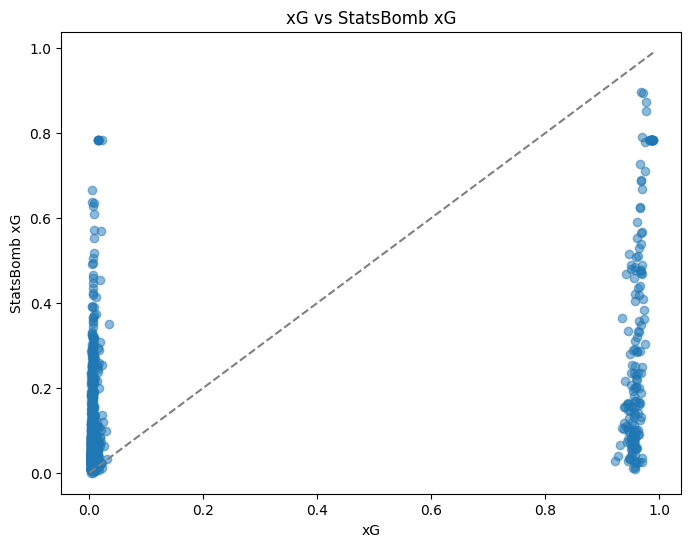

In [346]:


# # Extract the 'xG' and 'statsbombxG' columns
xG_values = xg_df['xG']
statsbombxG_values = xg_df['shot_statsbomb_xg']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(xG_values, statsbombxG_values, alpha=0.5)

# Add labels and title
plt.xlabel('xG')
plt.ylabel('StatsBomb xG')
plt.title('xG vs StatsBomb xG')

# Add a diagonal reference line
max_value = max(xG_values.max(), statsbombxG_values.max())
plt.plot([0, max_value], [0, max_value], linestyle='dashed', color='gray')

# Show the plot
plt.show()

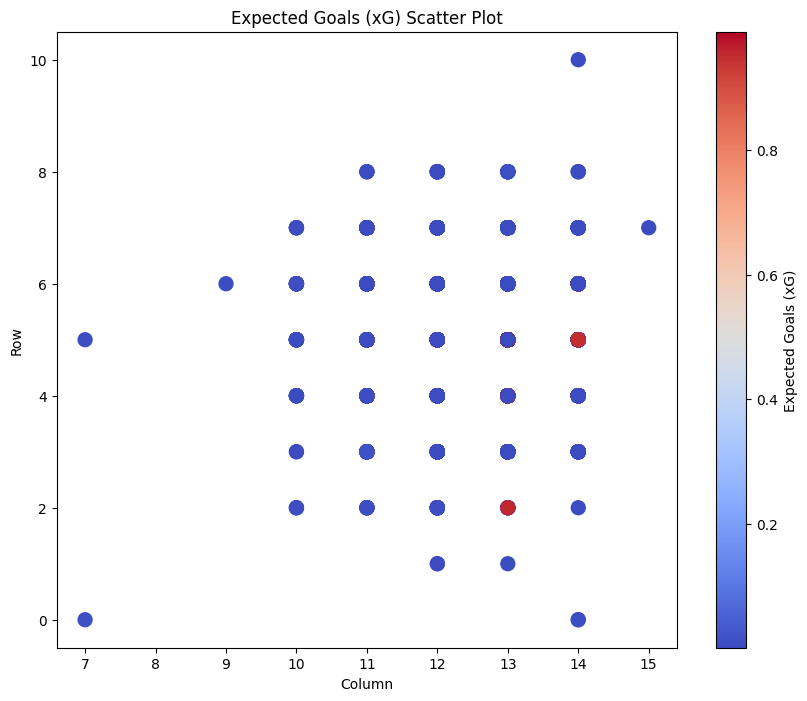

In [348]:

# Extract the 'row', 'column', and 'xG' columns
rows = xg_df['row']
columns = xg_df['column']
xG_values = xg_df['xG']

# Create a 2D scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(columns, rows, c=xG_values, cmap='coolwarm', s=100)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Expected Goals (xG)')

# Add labels and title
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Expected Goals (xG) Scatter Plot')

# Show the plot
plt.show()


In [358]:

average_xG_per_grid = final_df.groupby(['row', 'column'])['xG'].mean().reset_index()

average_xG_per_grid


,row,column,xG
0,0,0,0.0
1,0,1,0.0
2,0,2,0.0
3,0,3,0.0
4,0,4,0.0
...,...,...,...
182,11,11,0.0
183,11,12,0.0
184,11,13,0.0
185,11,14,0.0


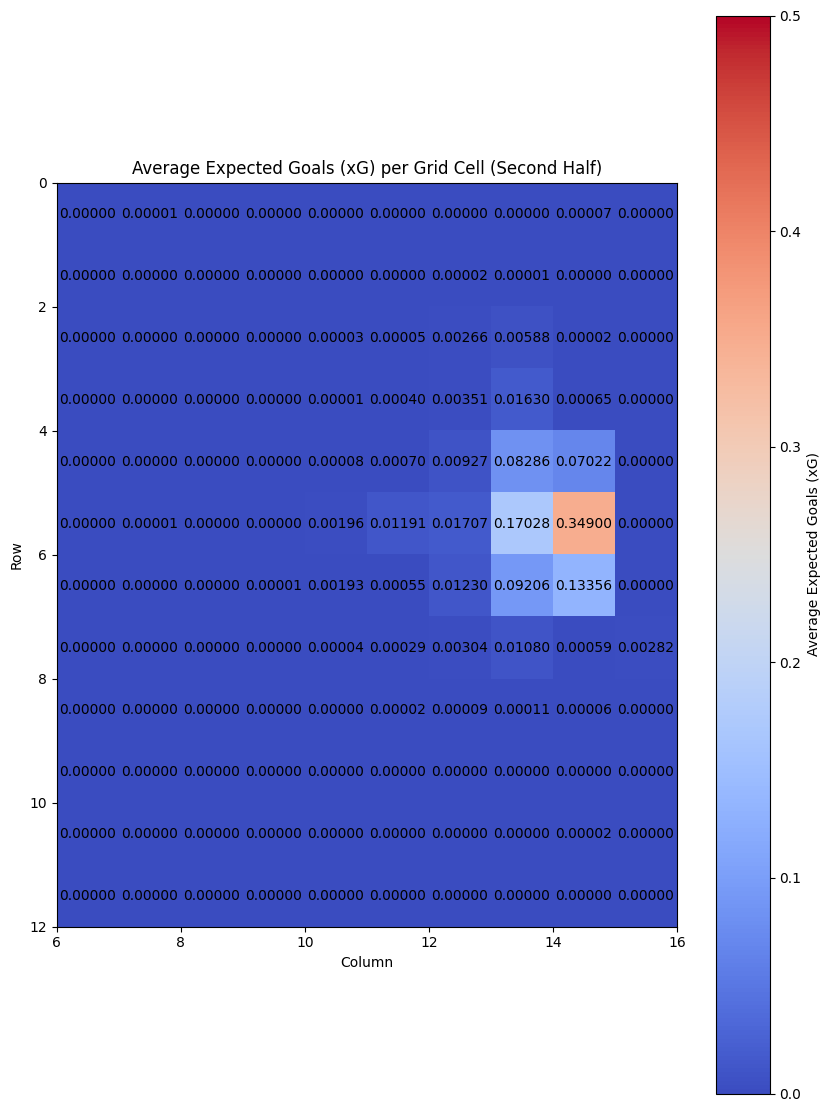

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the 'final_df' DataFrame with 'row', 'column', and 'xG' columns
# Replace 'your_data.csv' with the actual path to your data file
# final_df = pd.read_csv('your_data.csv')

# Create a 2D grid with dimensions 12x16 (replace with your actual grid dimensions)
num_rows, num_columns = 12, 16
grid_xG = np.zeros((num_rows, num_columns))

# Calculate the average xG for each grid cell
average_xG_per_grid = final_df.groupby(['row', 'column'])['xG'].mean().reset_index()

# Fill the grid with average xG values
for row, column, xG in zip(average_xG_per_grid['row'], average_xG_per_grid['column'], average_xG_per_grid['xG']):
    grid_xG[row, column] = xG

# Create the grid graph
plt.figure(figsize=(10, 14))
plt.imshow(grid_xG[:, 6:], cmap='coolwarm', vmin=0, vmax=0.5, origin='upper', extent=[6, num_columns, num_rows, 0])

# Add value annotations for each cell
for row in range(num_rows):
    for col in range(6, num_columns):
        plt.text(col + 0.5, row + 0.5, f'{grid_xG[row, col]:.5f}', ha='center', va='center', color='black')

# Set labels and title
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Average Expected Goals (xG) per Grid Cell (Second Half)')

# Customize the colorbar
cbar = plt.colorbar()
cbar.set_label('Average Expected Goals (xG)')

# Show the plot
plt.show()


In [325]:

# # Replace 'row', 'column', and 'xG' with your actual column names
# grid_data = xg_df.groupby(['row', 'column'])['xG'].mean().reset_index()

# # Assuming you have 'columns' value representing the number of columns in the grid
# # Replace 'columns' with your actual number of columns
# heatmap_data = grid_data.pivot(index='row', columns='column', values='xG')

# # Create the heatmap using seaborn
# plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
# sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".4f", cbar_kws={'label': 'Average xG'})
# plt.xlabel('Column')
# plt.ylabel('Row')
# plt.title('Average xG per Grid')
# plt.show()


In [326]:

# grid_data = xg_df.groupby(['row', 'column'])['shot_statsbomb_xg'].mean().reset_index()

# # Assuming you have 'columns' value representing the number of columns in the grid
# # Replace 'columns' with your actual number of columns
# heatmap_data = grid_data.pivot(index='row', columns='column', values='shot_statsbomb_xg')

# # Create the heatmap using seaborn
# plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
# sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".4f", cbar_kws={'label': 'Average xG from'})
# plt.xlabel('Column')
# plt.ylabel('Row')
# plt.title('Average xG from statsbomb per Grid')
# plt.show()



In [327]:

correlation = xg_df['xG'].corr(xg_df['shot_statsbomb_xg'])

# Step 2: Display the correlation coefficient
print("Correlation between xG and shot_statsbomb_xg:", correlation)


Correlation between xG and shot_statsbomb_xg: 0.4995909479743671


In [328]:
final_df['xG'] = xg_df['xG']

final_df['xG'] = final_df['xG'].fillna(0)

### Transition matrix form x,y to z,w

In [333]:
def move_transition_matrix(df):
    """
    Calculate the move transition matrix for all grid cells in the DataFrame.

    Parameters:
        df (pandas.core.frame.DataFrame): The DataFrame containing all the events.

    Returns:
        np.ndarray: The transition matrix, denoting the probabilities of successful transitions.
    """
    # Filter the DataFrame to include only move actions (pass, shot, cross)
    move_actions = df[(df['type'] == 'Pass') | (df['type'] == 'Shot') | (df['type'] == 'Cross')]

    # Count the total number of move actions in the DataFrame
    total_move_actions = move_actions.shape[0]

    if total_move_actions == 0:
        return np.zeros((l, w, l, w))

    # Initialize the transition matrix
    l, w = df['row'].max() + 1, df['column'].max() + 1
    transition_matrix = np.zeros((l, w, l, w))

    # Calculate the transition probabilities for each cell pair in the grid
    for start_row in range(l):
        for start_column in range(w):
            start_cell_events = move_actions[(move_actions['row'] == start_row) & (move_actions['column'] == start_column)]
            total_start_cell_events = start_cell_events.shape[0]

            if total_start_cell_events == 0:
                continue

            for end_row in range(l):
                for end_column in range(w):
                    end_cell_events = start_cell_events[(start_cell_events['end_row'] == end_row) & (start_cell_events['end_column'] == end_column)]
                    transition_matrix[start_row, start_column, end_row, end_column] = end_cell_events.shape[0] / total_start_cell_events

    return transition_matrix

# Example usage:
# Call the move_transition_matrix function to get the transition matrix
transition_matrix = move_transition_matrix(final_df)

# print("Move Transition Matrix:")
# print(transition_matrix)


Move Transition Matrix:


### Combine all the formula together

dont delete this code

In [ ]:
# xT = np.zeros(len(move_matrix))
# iterations = 5
# for k in range(iterations):
#     xTtemp = xT
#     for i in range(len(xT)):
#         pass_payoff = 0
#         for j in range(len(xT)):
#             pass_payoff += Transition_matrix[i,j]*xT[j]
#         xTtemp[i] = move_matrix[i]*pass_payoff + shot_matrix[i]*goal_matrix[i]
#     xT = xTtemp

In [ ]:
# xTfinal = xT.reshape((12,16))

## Calcualting VAEP

formula for vaep :  V (ai) = Q(Si) − Q(Si−1)

# Result Analysis